# MA - INF 2201 - Computer Vision WS 22/23

### Exercise Sheet 01


In [1]:
import cv2 as cv
import numpy as np
import random
import time
from matplotlib import pyplot as plt

(300, 480, 3)


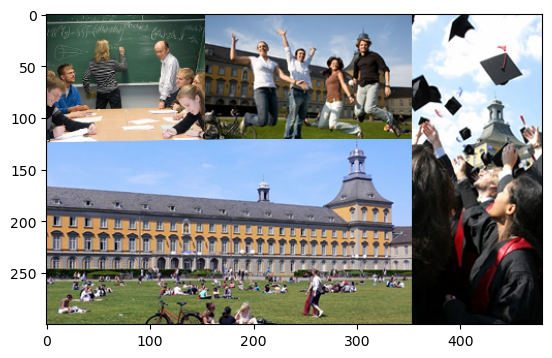

In [2]:
img = cv.imread("bonn.png")
print(img.shape)
plt.imshow(img[:, :, (2, 1, 0)])

### 1. Rectangles and Integral Images

Read the image bonn.png and convert it to a grey image.

**(a)** Compute and display the integral image without using the function
integral.

**(b)** Compute the mean grey value of the image by:

1. summing up each pixel value in the image, i.e., $ \frac{1}{R} \sum_{p\in R} I(p)$,
2. computing an integral image using the function integral,
3. computing an integral image with your implementation.
    
**(c)** Select 10 random squares of size 100x100 within the image and compute the mean grey value using the three versions. Output the runtime of this task for the three versions in seconds using time.

Mean gray value summing up 18036614 
Mean gray value cv integral 18036614 
Mean gray value my implementation 18036614 
time for sum: 0.02048278
time for cv integral: 0.00007963
time for my implementation: 0.00063181


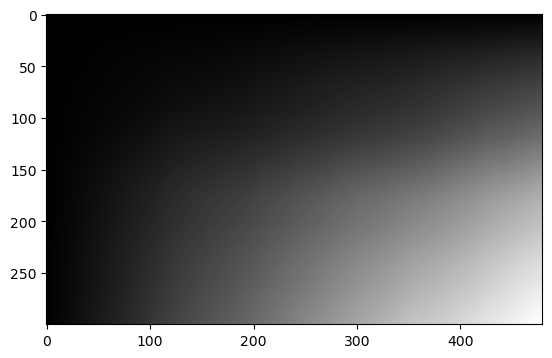

In [3]:
# ********************TASK1***********************

def integral_image(img):
    # Your implementation of integral image
    # compute cumulative sum row wise
    integral_img = np.cumsum(a=img, axis=1)
    # compute cumulative sum col wise
    integral_img = np.cumsum(a=integral_img, axis=0)

    return integral_img

def sum_image(image):
    # loop over image
    sum = 0
    for height in range(image.shape[0]):
        for width in range(image.shape[1]):
            sum += image[height, width]
    return sum

def time_10_rand_squares(fct, img, square_size):

    # get maximum random value for img corner generation
    height = img.shape[0] - square_size
    width = img.shape[1] - square_size
    #set variable to sum up all times for the 10 image patches
    time_sum = 0

    for i in range(10):
        # generate random corner for the image square
        corner = (np.random.randint(1, height + 1), np.random.randint(1, width + 1 ))
        # start timer let function run and then end timer
        start_time = time.time()
        fct(img[corner[0] : corner[0] + square_size, corner[1] : corner[1] + square_size])
        end_time = time.time()
        # sum up the time
        time_sum = time_sum + (end_time - start_time)

    return time_sum

def task1():
    # a: compute and display the integral image:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    integral_bonn = integral_image(img_gray)
    plt.imshow(integral_bonn, cmap="gray")

    # b: compute mean gray value:
    # 1. sum up
    print("Mean gray value summing up %d " % sum_image(img_gray))
    # 2. using integral cv function
    print("Mean gray value cv integral %d " % cv.integral(img_gray)[-1, -1])
    # 3. my implementation
    print("Mean gray value my implementation %d " % integral_image(img_gray)[-1, -1])

    # c:
    print("time for sum: %0.8f" % time_10_rand_squares(sum_image, img_gray, 100))
    print("time for cv integral: %0.8f" % time_10_rand_squares(cv.integral, img_gray, 100))
    print("time for my implementation: %0.8f" % time_10_rand_squares(integral_image, img_gray, 100))
    
task1()

## 2. Histogram Equalization

Read the image bonn.png and convert it to a grey image and perform histogram equalization:

**(a)** using equalizeHist

**(b)** using your implementation of the function equalizeHist.

Display both results. Compute the absolute pixelwise difference between the results and print the maximum pixel error. (2 Points)

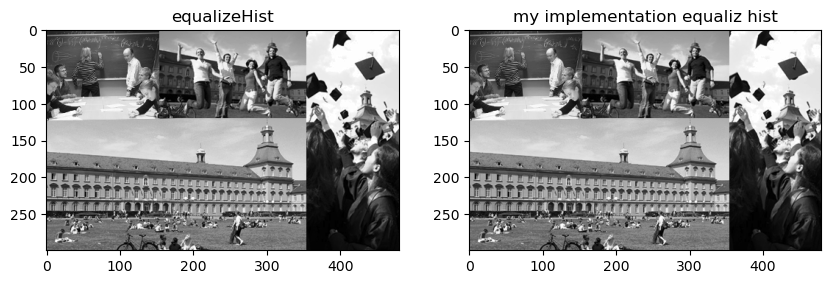

In [25]:
def equalize_hist_image(img):
    # Your implementation of histogram equalization
    # pixels as distribution:
    img_cpy = img.copy()
    px_amount = img_cpy.shape[0] * img_cpy.shape[1]
    vals, occurs = np.unique(img_cpy, return_counts = True)

    # normalize cumulative distr of histogram
    cum_norm_occurs = np.cumsum(occurs/px_amount) * 255

    # loop over intensity values and replace intensity values with norm vals
    for x, x_norm in zip(vals, cum_norm_occurs):
        img_cpy[img == x] = int(np.round(x_norm))
        
    return img_cpy

def task2():
    # Your implementation of Task2
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # a)
    img_gray_norm_a = cv.equalizeHist(img_gray)
    # b)
    img_gray_norm_b = equalize_hist_image(img_gray.astype(int))


    _, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].set_title("equalizeHist")
    ax[0].imshow(img_gray_norm_a, cmap="gray", norm=None)
    ax[1].set_title("my implementation equaliz hist")
    ax[1].imshow(img_gray_norm_b, cmap="gray", norm=None)

task2()       

## 4. 2D Filtering
Read the image bonn.png and convert it to a grey image, and display it.

Filter the image with a Gaussian kernel with σ = 2√2

**(a)** using the function GausianBlur

**(b)** using the function filter2D without using the function getGaussianKernel

**(c)** using the function sepFilter2D without using the function getGaussianKernel

and display the three results. Compute the absolute pixel-wise difference
between all pairs (there are three pairs) and print the maximum pixel
error for each pair. (2 Points)


Pairwise Difference between a) and b):  3.730395833333333
Pairwise Difference between a) and c):  3.7303819444444444
Pairwise Difference between b) and c):  2.777777777777778e-05


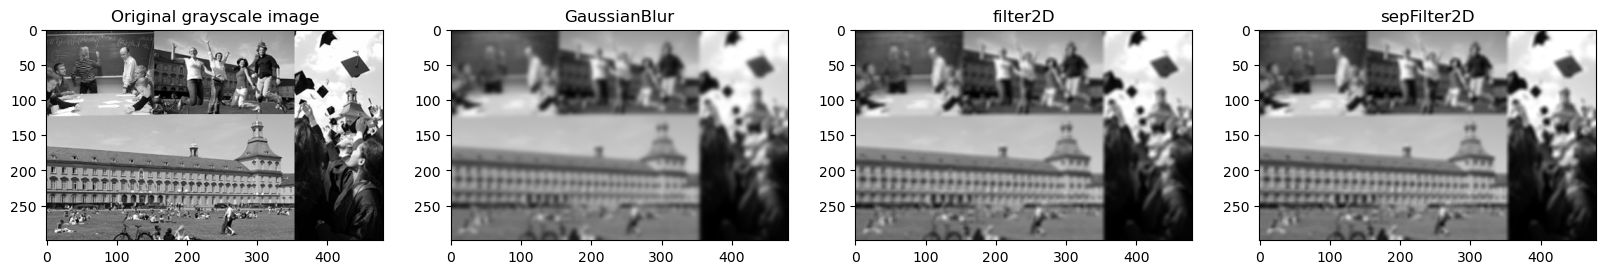

In [23]:
# ********************TASK4***********************
def get_kernel(sigma):
    # Your implementation of getGaussianKernel
    # with sigma = 2 sqrt 2 set half-width of filter to 3 sigma
    kernel_size = int(np.round(3 * sigma))

    onedim_kernel = []
    # for every filter size compute gaussian kernel (shit values because gaussian is centered at 0)
    for i in range(-kernel_size//2, kernel_size//2):
        # constant factor before is said to be ignored in the lecture
        g_sigma =  np.exp(- i**2 / (2 * sigma**2))
        onedim_kernel.append(g_sigma)

    # normalize so that the kernel sums up to one
    return onedim_kernel /  sum(onedim_kernel)


def task4():
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    sigma = 2 * np.sqrt(2)

    # a) set ksize to zero to let the function compute from sigma
    gaussian_blur_img1 = cv.GaussianBlur(img_gray, ksize = [0,0], sigmaX = sigma, sigmaY = sigma)

    # b) 
    kernel = get_kernel(sigma)
    # compute outer product to calculate kernel matix from vector
    kernel_matrix = np.outer(kernel, kernel)
    gaussian_blur_img2 = cv.filter2D(img_gray, kernel=kernel_matrix, ddepth=-1)

    # c)
    gaussian_blur_img3 = cv.sepFilter2D(img_gray, kernelX=kernel, kernelY=kernel, ddepth=-1)

    _, ax = plt.subplots(1, 4, figsize=(20, 20))
    ax[0].set_title("Original grayscale image")
    ax[0].imshow(img_gray, cmap="gray")
    ax[1].set_title("GaussianBlur")
    ax[1].imshow(gaussian_blur_img1, cmap="gray")
    ax[2].set_title("filter2D")
    ax[2].imshow(gaussian_blur_img2, cmap="gray")
    ax[3].set_title("sepFilter2D")
    ax[3].imshow(gaussian_blur_img3, cmap="gray")

    # compute the pairwise difference:
    print("Pairwise Difference between a) and b): ", 
    np.abs(gaussian_blur_img1.astype(int) - gaussian_blur_img2.astype(int)).mean())
    print("Pairwise Difference between a) and c): ", 
    np.abs(gaussian_blur_img1.astype(int) - gaussian_blur_img3.astype(int)).mean())
    print("Pairwise Difference between b) and c): ", 
    np.abs(gaussian_blur_img2.astype(int) - gaussian_blur_img3.astype(int)).mean())

task4()

## 5. Multiple Gaussian Filters

Read the image bonn.png, convert it into a grey image, and display it.
Filter the image

**(a)** twice with a Gaussian kernel with σ = 2

**(b)** once with a Gaussian kernel with σ = 2√2

and display both results, compute the absolute pixel-wise difference between the results, and print the maximum pixel error. (1 Point)

Max Pixel error: 1


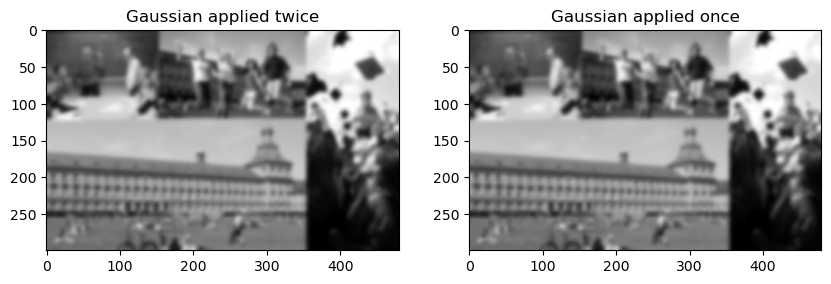

In [22]:
def task5():
    # Your implementation of task 5
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # a) apply gaussian twice
    sigma_a = 2 
    gaussian_twice = cv.GaussianBlur(img_gray, ksize=[0, 0], sigmaX=sigma_a, sigmaY=sigma_a)
    gaussian_twice = cv.GaussianBlur(gaussian_twice, ksize=[0, 0], sigmaX=sigma_a, sigmaY=sigma_a)

    # b) gaussian once
    sigma_b = 2 * np.sqrt(2)
    gaussian_once = cv.GaussianBlur(img_gray, ksize=[0, 0], sigmaX=sigma_b, sigmaY=sigma_b)

    pixel_difference = np.abs(gaussian_twice.astype(int) - gaussian_once.astype(int))
    max_pixel_error = pixel_difference.max()
    
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1.imshow(gaussian_twice, cmap="gray")
    ax1.set_title("Gaussian applied twice")
    ax2.imshow(gaussian_once, cmap="gray")
    ax2.set_title("Gaussian applied once")
    print("Max Pixel error:", max_pixel_error)
    

task5()

## 7. Denoising

Read the image bonn.png, convert it into a grey image, add 30% salt and pepper noise (the chance that a pixel is converted to a black or white pixel is 30%), and display it. Filter the image by

**(a)** a Gaussian kernel

**(b)** a Median filter using the function medianBlur

**(c)** a Bilateral filter using the function bilateralFilter

and display the three results. Select the filter size from the range [1, 3, 5, 7, 9] that minimizes the mean distance between the filtered image and the original grey image. (3 Points)


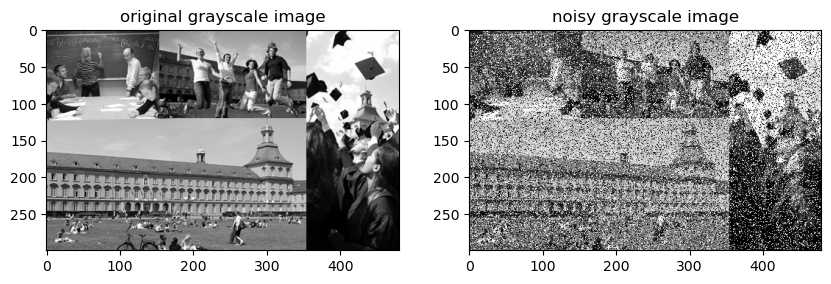

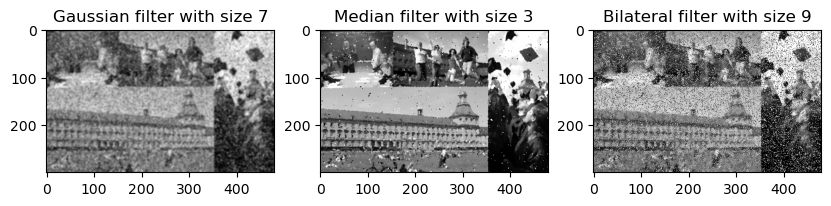

In [59]:
# ********************TASK7***********************
def add_salt_n_pepper_noise(img):
    # Your implementation of adding noise to the image
    # probability for noise
    img_cpy = img.copy()
    prob = 0.3
    # noise array with probabilty 0.3 generated, 0 for salt, 1 for normal, 255 for pepper
    noise= np.random.choice([0, 1, 255], size=img_cpy.shape, p=[prob/2, 1 - prob, prob/2])

    img_cpy[noise == 0] = 0
    img_cpy[noise == 255] = 255

    return img_cpy

def compute_mean_distance(img1, img2):
    difference = np.abs(img1 - img2)
    return difference.mean()

def compare_gaussian_filtersize(img_gray, img_noise, best_gaussian_mean, filtersize):
    # copy for destination array
    filtered_img = np.zeros_like(img_gray)
    # use GaussianBlur function
    filtered_img = cv.GaussianBlur(img_noise, ksize=[filtersize,filtersize], sigmaX=0, sigmaY=0)
    # compute mean
    mean_diff = compute_mean_distance(img_gray.astype(int), filtered_img)
    # if new filter mean is smaller replace current list
    if mean_diff < best_gaussian_mean[0]:
        best_gaussian_mean = [mean_diff, filtersize, filtered_img]
    
    return best_gaussian_mean

def compare_median_filtersize(img_gray, img_noise, best_median_mean, filtersize):
    # copy for destination array
    filtered_img = np.zeros_like(img_gray)
    # use medianBlur function
    filtered_img = cv.medianBlur(img_noise, ksize=filtersize)
    #compute mean
    mean_diff = compute_mean_distance(img_gray.astype(int), filtered_img)
    # if new filter mean is smaller replace current list
    if mean_diff < best_median_mean[0]:
        best_median_mean = [mean_diff, filtersize, filtered_img]
    
    return best_median_mean

def compare_bilateral_filtersize(img_gray, img_noise, best_bilat_mean, filtersize):
    # copy for destination array
    filtered_img = np.zeros_like(img_gray)
    # use bilateralFilter function
    filtered_img = cv.bilateralFilter(img_noise, d=filtersize, sigmaColor=80, sigmaSpace=80)
    #compute mean
    mean_diff = compute_mean_distance(img_gray.astype(int), filtered_img)
    # if new filter mean is smaller replace current list
    if mean_diff < best_bilat_mean[0]:
        best_bilat_mean = [mean_diff, filtersize, filtered_img]
    
    return best_bilat_mean


def task7():
    # Your implementation of task 7
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray_noise = add_salt_n_pepper_noise(img_gray)
    filter_sizes = [1, 3, 5, 7, 9]
    
    # a) Gaussian kernel
    # list to save and compare best mean and save mean, filtersize, and img
    best_gaussian, best_median, best_bilat = [np.infty, 0, None], [np.infty, 0, None], [np.infty, 0, None]
    for f in filter_sizes:
        best_gaussian = compare_gaussian_filtersize(
            img_gray, img_gray_noise, best_gaussian, f
            )
        best_median = compare_median_filtersize(
            img_gray, img_gray_noise, best_median, f
            )
        best_bilat = compare_bilateral_filtersize(
            img_gray, img_gray_noise, best_bilat, f
            )

    _, ax1 = plt.subplots(1, 2, figsize=(10, 10))
    ax1[0].set_title("original grayscale image")
    ax1[0].imshow(img_gray, cmap="gray")
    ax1[1].set_title("noisy grayscale image")
    ax1[1].imshow(img_gray_noise, cmap="gray")
    
    _, ax2 = plt.subplots(1, 3, figsize=(10, 10))
    ax2[0].set_title(f"Gaussian filter with size {best_gaussian[1]}")
    ax2[0].imshow(best_gaussian[2], cmap="gray")
    ax2[1].set_title(f"Median filter with size {best_median[1]}")
    ax2[1].imshow(best_median[2], cmap="gray")
    ax2[2].set_title(f"Bilateral filter with size {best_bilat[1]}")
    ax2[2].imshow(best_bilat[2], cmap="gray")


task7()

## 8. Separability of Filters

Read the image bonn.png and convert it into a grey image.

**(a)** Filter the image using the two 2D kernels given below.

**(b)** Use the class SVD of OpenCV to separate each kernel. If a kernel is not separable, use an approximation by taking only the highest singular value. Filter the images with the obtained 1D kernels and display the results.

**(c)** Compute the absolute pixel-wise difference between the results of (a) and (b), and print the maximum pixel error.


In [74]:
# ********************TASK8***********************
def task8():
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    K1 = np.array([
        [0.0113, 0.0838, 0.0113],
        [0.0838, 0.6193, 0.0838],
        [0.0113, 0.0838, 0.0113],
    ])
    K2 = np.array([
        [-0.8984, 0.1472, 1.1410],
        [-1.9075, 0.1566, 2.1359],
        [-0.8659, 0.0573, 1.0337],
    ])

    # a)
    img_K1 = cv.filter2D(img_gray, ddepth=-1, kernel=K1)
    img_K2 = cv.filter2D(img_gray, ddepth=-1, kernel=K2)

    # b) 
    w, u, vt = np.zeros((3,2)), np.zeros((2,2)), np.zeros((2,3))
    K1_svd = cv.SVD.compute(K1, w, u, vt)
    print(w, u, vt)

